## Compare the similarities of the synthietic data with real data based on some evalutation matrices

## Abstract:
Time-series datasets used in machine learning applications often are small in size, making the training of deep neural network architectures ineffective. For time series, the suite of data augmentation tricks we can use to expand the size of the dataset is limited by the need to maintain the basic properties of the signal. Data generated by a Generative Adversarial Network (GAN) can be utilized as another data augmentation tool. RNN-based GANs suffer from the fact that they cannot effectively model long sequences of data points with irregular temporal relations. To tackle these problems, we introduce TTS-GAN, a transformer-based GAN which can successfully generate realistic synthetic time series data sequences of arbitrary length, similar to the original ones. Both the generator and discriminator networks of the GAN model are built using a pure transformer encoder architecture. We use visualizations to demonstrate the similarity of real and generated time series and a simple classification task that shows how we can use synthetically generated data to augment real data and improve classification accuracy.

## Key Idea:

Transformer GAN generate synthetic time-series data
### The TTS-GAN Architecture
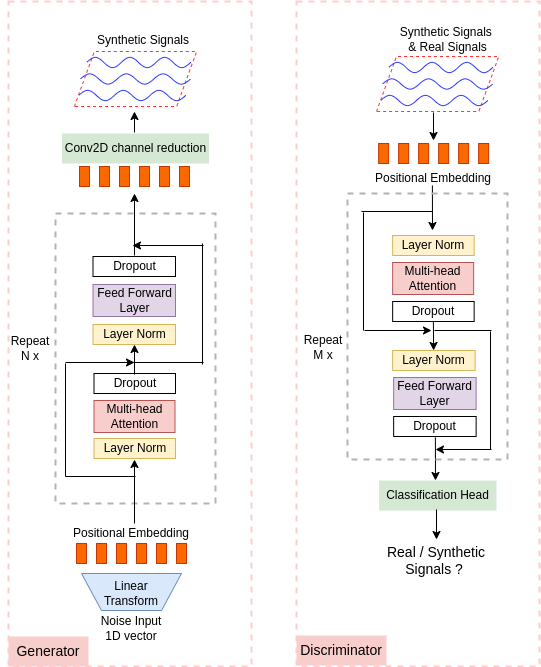



The TTS-GAN model architecture is shown in the upper figure. It contains two main parts, a generator, and a discriminator. Both of them are built based on the transformer encoder architecture. An encoder is a composition of two compound blocks. A multi-head self-attention module constructs the first block and the second block is a feed-forward MLP with GELU activation function. The normalization layer is applied before both of the two blocks and the dropout layer is added after each block. Both blocks employ residual connections.

### The time series data processing step
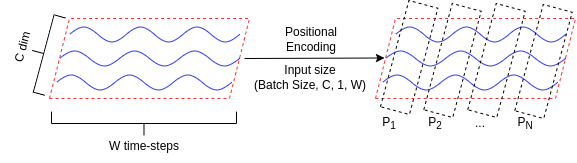





We view a time-series data sequence like an image with a height equal to 1. The number of time-steps is the width of an image, W. A time-series sequence can have a single channel or multiple channels, and those can be viewed as the number of channels (RGB) of an image, C. So an input sequence can be represented with the matrix of size (Batch Size, C, 1, W). Then we choose a patch size N to divide a sequence into W / N patches. We then add a soft positional encoding value by the end of each patch, the positional value is learned during model training. Each patch will then have the data shape (Batch Size, C, 1, (W/N) + 1) This process is shown in the upper figure.

### Step 1: Load Real running and Jumping data

In [3]:
from LoadRealRunningJumping import *
from torch.utils import data

In [4]:
train_set = Running_Or_Jumping(incl_xyz_accel = True, incl_rms_accel = False, is_normalize = True, data_mode = 'Train')

data shape is (1200, 3, 1, 150), label shape is (1200, 1)
Jumping label is 1, has 600 samples, Running label is 0, has 600 samples


In [5]:
real_data_loader = data.DataLoader(train_set, batch_size=1, num_workers=1, shuffle=True)

In [6]:
import matplotlib.pyplot as plt
real_running = []
real_jumping = []

for i, (real_sig, label) in enumerate(real_data_loader):
    real_sig = real_sig.cpu().detach().numpy()
    sig = real_sig.reshape(real_sig.shape[1], real_sig.shape[3])
    if label[0] == 0:
        real_running.append(sig)
    elif label[0] == 1:
        real_jumping.append(sig)

real_running = np.array(real_running)
real_jumping = np.array(real_jumping)
print(real_running.shape)
print(real_jumping.shape)

(600, 3, 150)
(600, 3, 150)


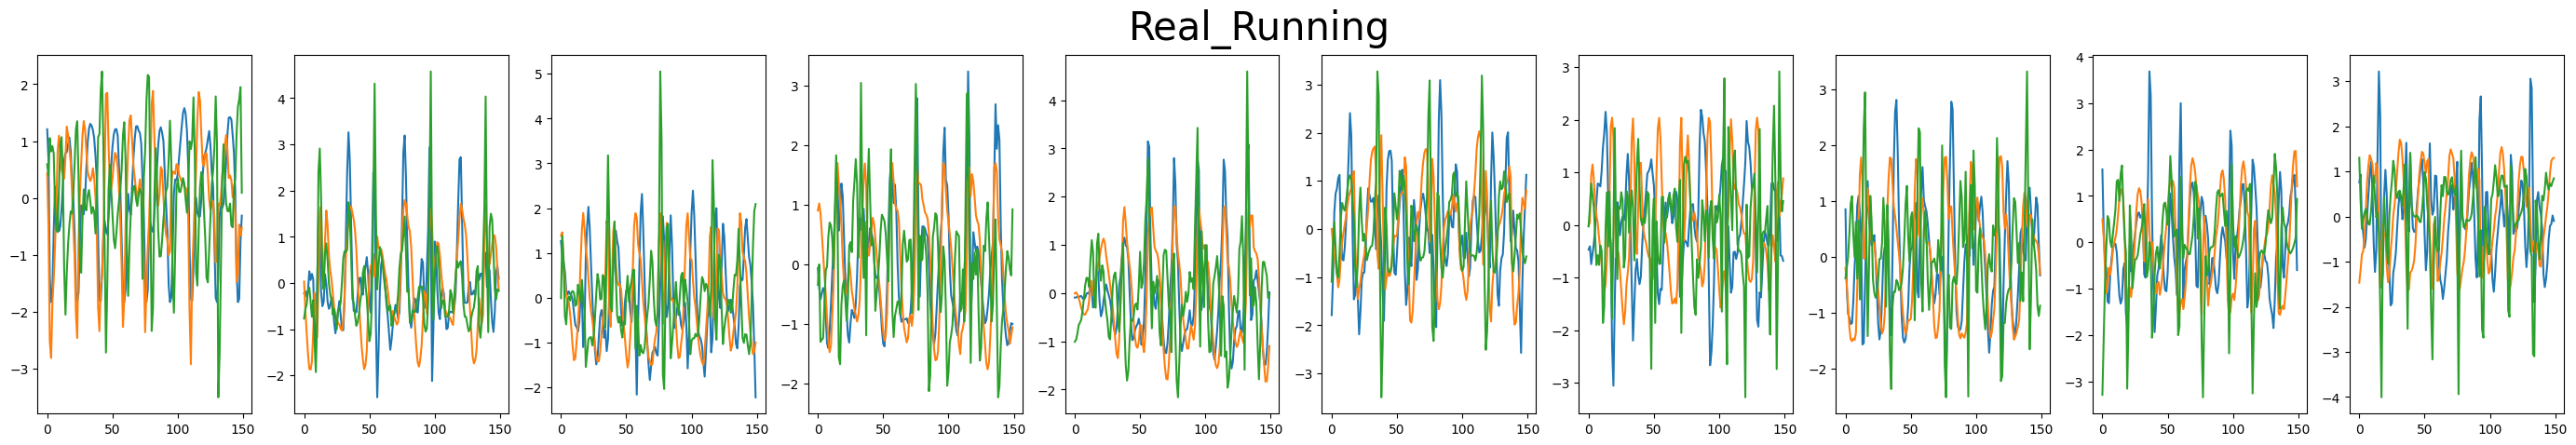

In [7]:
fig, axs = plt.subplots(1, 10, figsize=(35,5))
fig.suptitle('Real_Running', fontsize=30)
for i in range(10):
    axs[i].plot(real_running[i][0][:])
    axs[i].plot(real_running[i][1][:])
    axs[i].plot(real_running[i][2][:])

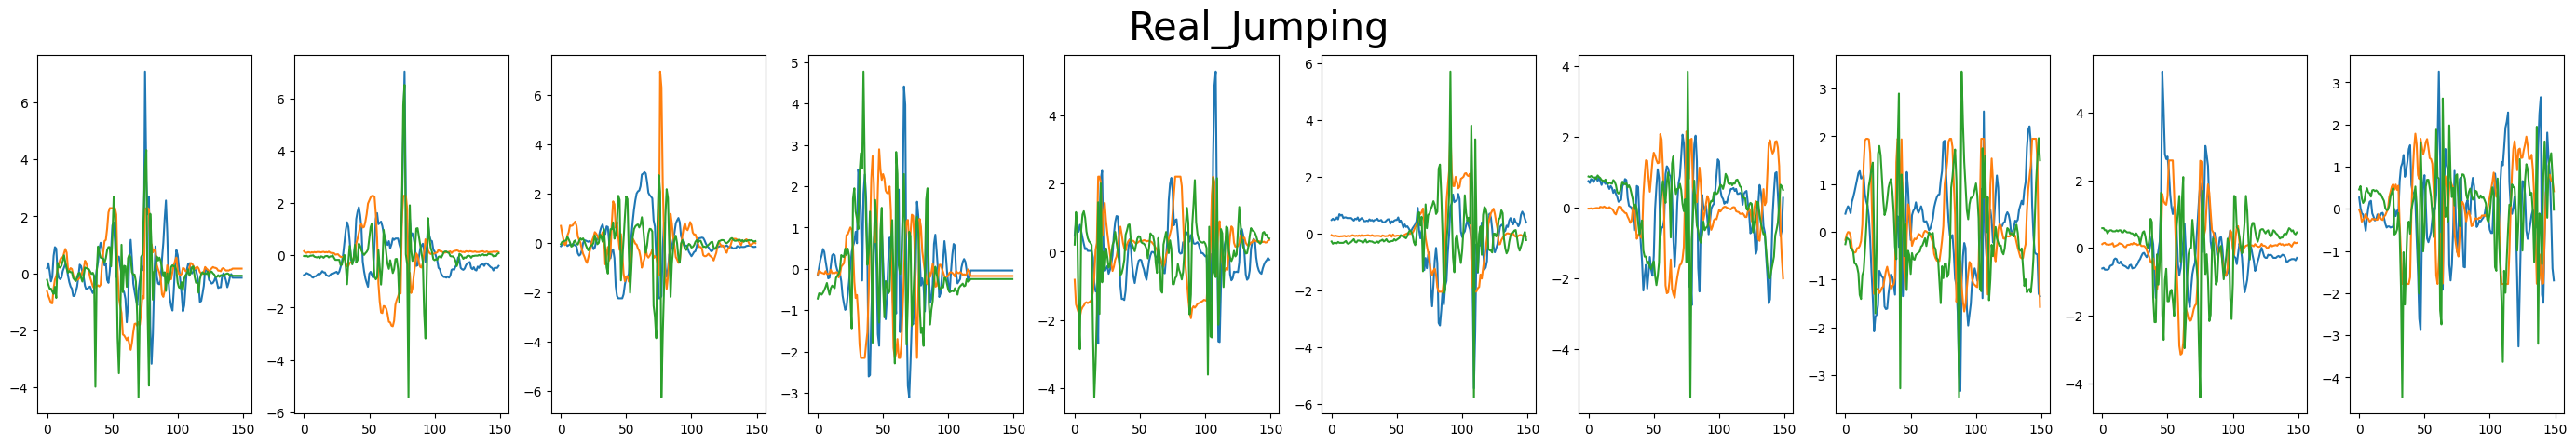

In [8]:
fig, axs = plt.subplots(1, 10, figsize=(35,5))
fig.suptitle('Real_Jumping', fontsize=30)
for i in range(10):
    axs[i].plot(real_jumping[i][0][:])
    axs[i].plot(real_jumping[i][1][:])
    axs[i].plot(real_jumping[i][2][:])

### Step 2: Load synthetic running and juumping data

In [9]:
from LoadSyntheticRunningJumping import *
from torch.utils import data

In [10]:
syn_data = Synthetic_Dataset()

(2000, 3, 1, 150)
(2000, 1)


In [11]:
syn_data_loader = data.DataLoader(syn_data, batch_size=1, num_workers=1, shuffle=True)

In [12]:
import matplotlib.pyplot as plt
syn_running = []
syn_jumping = []

for i, (syn_sig, label) in enumerate(syn_data_loader):
    syn_sig = syn_sig.cpu().detach().numpy()
    sig = syn_sig.reshape(syn_sig.shape[1], syn_sig.shape[3])
    if label[0] == 0:
        syn_running.append(sig)
    elif label[0] == 1:
        syn_jumping.append(sig)

syn_running = np.array(syn_running)
syn_jumping = np.array(syn_jumping)
print(syn_running.shape)
print(syn_jumping.shape)

(1000, 3, 150)
(1000, 3, 150)


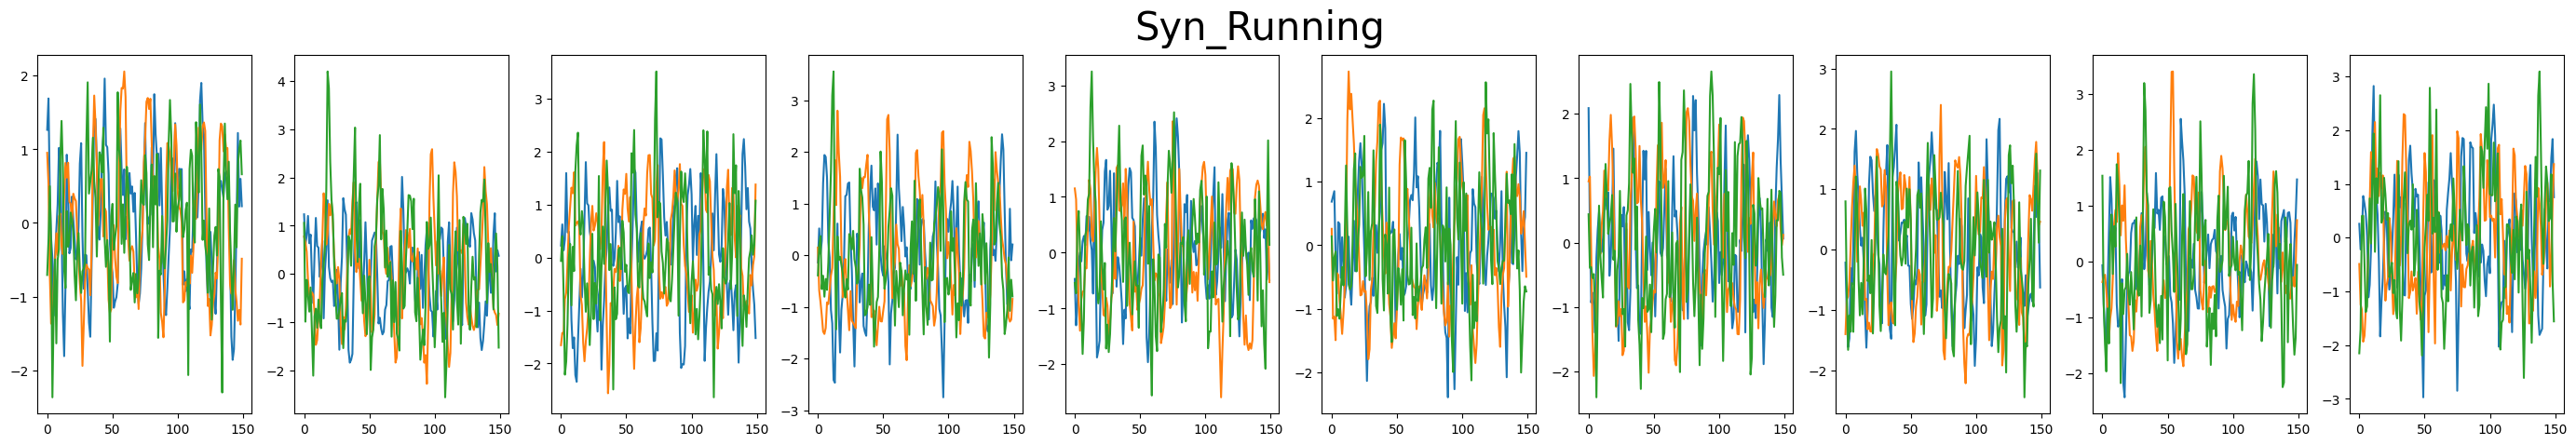

In [13]:
fig, axs = plt.subplots(1, 10, figsize=(35,5))
fig.suptitle('Syn_Running', fontsize=30)
for i in range(10):
    axs[i].plot(syn_running[i][0][:])
    axs[i].plot(syn_running[i][1][:])
    axs[i].plot(syn_running[i][2][:])

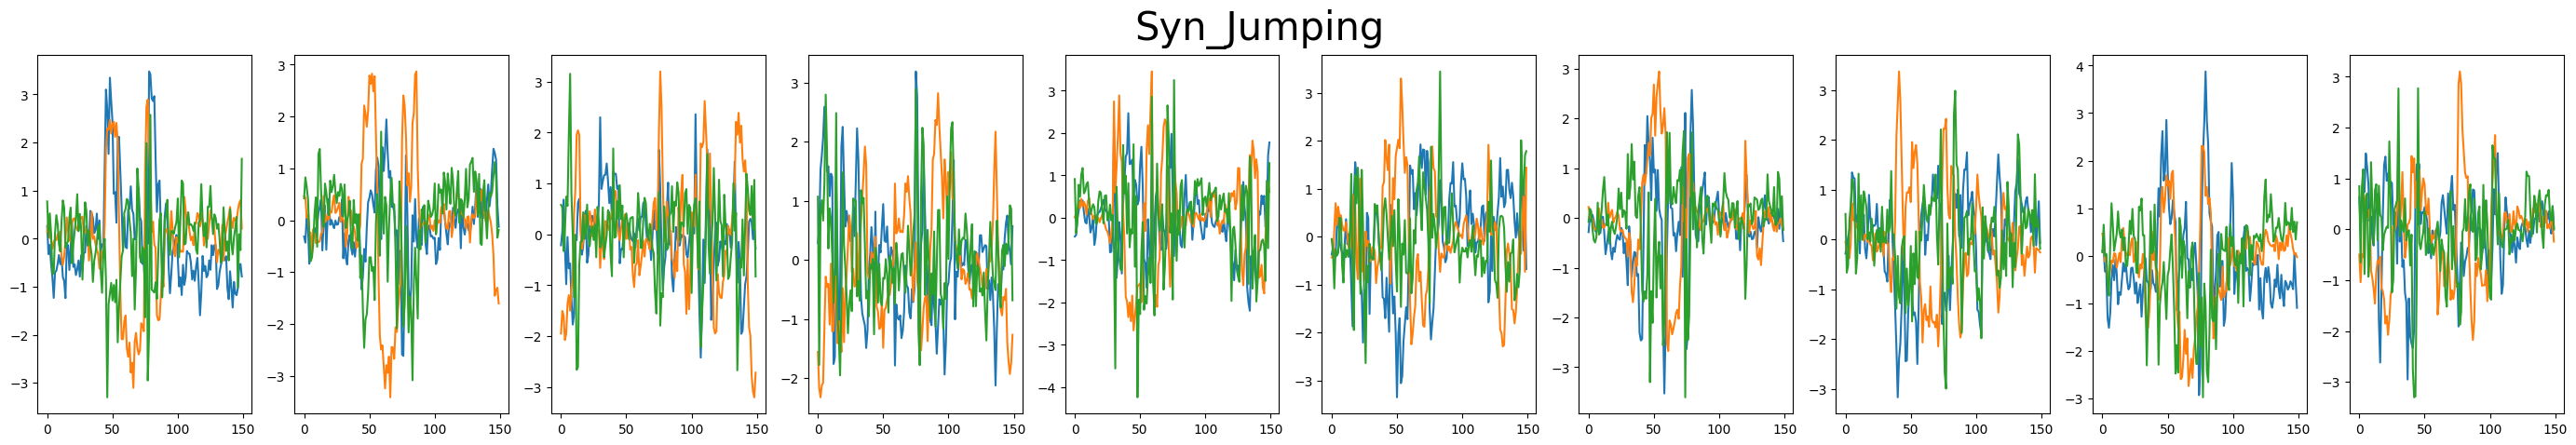

In [14]:
fig, axs = plt.subplots(1, 10, figsize=(35,5))
fig.suptitle('Syn_Jumping', fontsize=30)
for i in range(10):
    axs[i].plot(syn_jumping[i][0][:])
    axs[i].plot(syn_jumping[i][1][:])
    axs[i].plot(syn_jumping[i][2][:])

### Step 3: PCA

In [15]:
print(real_running.shape)
print(real_jumping.shape)
print(syn_running.shape)
print(syn_jumping.shape)

(600, 3, 150)
(600, 3, 150)
(1000, 3, 150)
(1000, 3, 150)


In [16]:
real_running = np.transpose(real_running, (0, 2, 1))
real_jumping = np.transpose(real_jumping, (0, 2, 1))
syn_running = np.transpose(syn_running, (0, 2, 1))
syn_jumping = np.transpose(syn_jumping, (0, 2, 1))
print(real_running.shape)
print(real_jumping.shape)
print(syn_running.shape)
print(syn_jumping.shape)

(600, 150, 3)
(600, 150, 3)
(1000, 150, 3)
(1000, 150, 3)


In [17]:
from visualizationMetrics import visualization

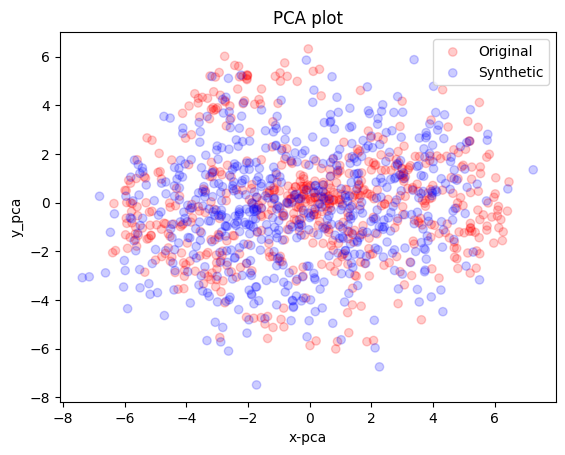

In [18]:
visualization(real_running, syn_running, 'pca', 'Running-pca')

In [19]:
#visualization(real_running, syn_jumping, 'pca')

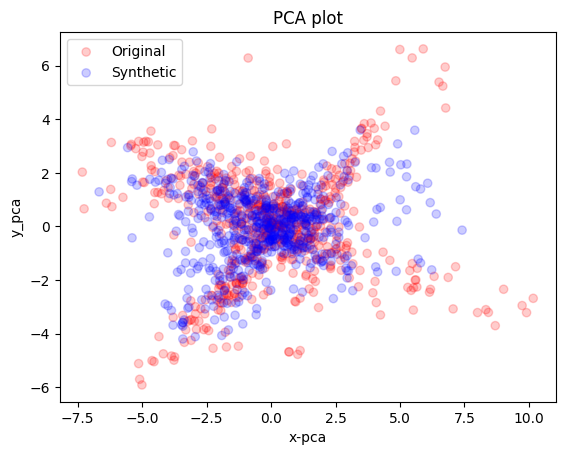

In [20]:
visualization(real_jumping, syn_jumping, 'pca', 'Jumping-pca')

In [21]:
#visualization(real_jumping, syn_running, 'pca')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.001s...
[t-SNE] Computed neighbors for 1200 samples in 0.138s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 2.298312
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.194328
[t-SNE] KL divergence after 300 iterations: 1.644682


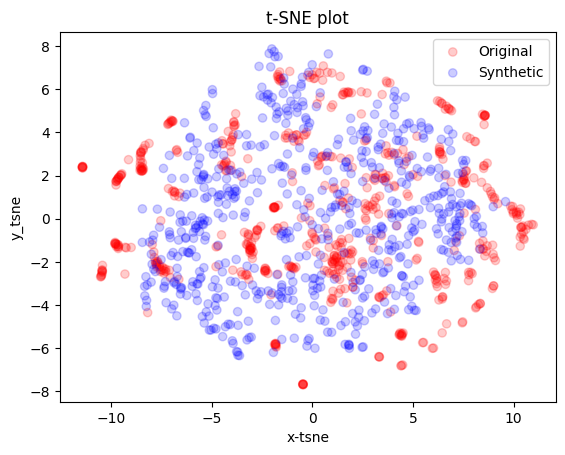

In [22]:
visualization(real_running, syn_running, 'tsne', 'Running-tsne')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.001s...
[t-SNE] Computed neighbors for 1200 samples in 0.050s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 2.344920
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.199005
[t-SNE] KL divergence after 300 iterations: 1.609183


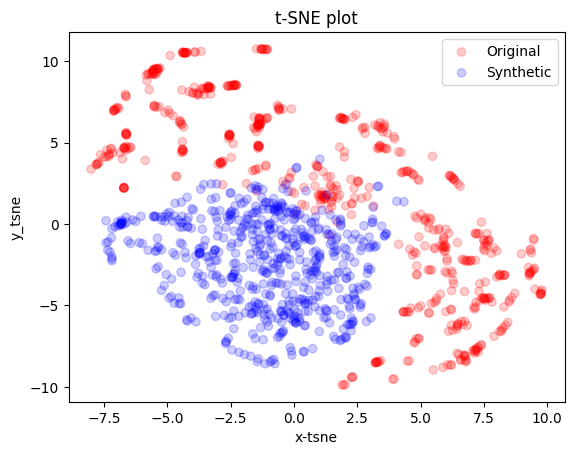

In [23]:
visualization(real_running, syn_jumping, 'tsne', 'Real-R_Syn_J-tsne')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.001s...
[t-SNE] Computed neighbors for 1200 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 2.200803
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.992989
[t-SNE] KL divergence after 300 iterations: 1.935994


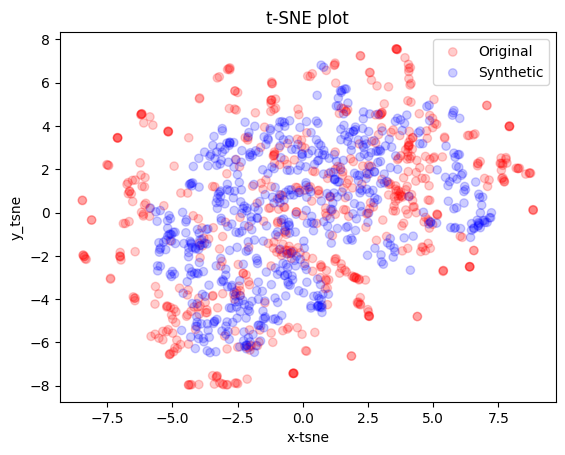

In [24]:
visualization(real_jumping, syn_jumping, 'tsne', 'Jumping-tsne')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.001s...
[t-SNE] Computed neighbors for 1200 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 2.372857
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.338463
[t-SNE] KL divergence after 300 iterations: 1.823898


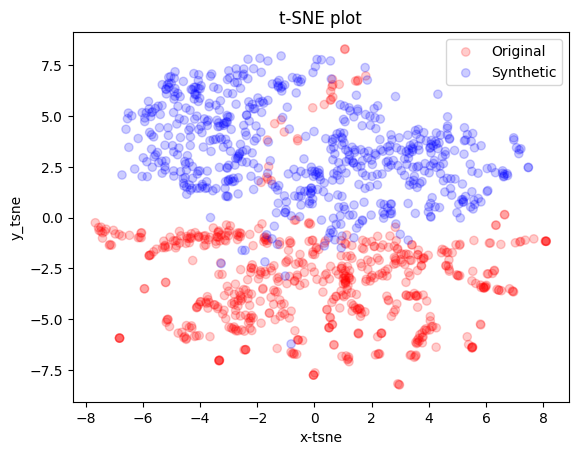

In [25]:
visualization(real_jumping, syn_running, 'tsne', 'Real-J_Syn_R-tsne')